In [144]:
input_file = './data/input/78673.csv'
output_file = './data/output/output.csv'
baseline_length = 1500
system_latency = 0

command = f"python3 data_normalization.py {input_file} {output_file} {baseline_length} {system_latency}"
!{command}


Number of rows:  70 Baseline length:  1500  samples  ( 90 )

Global mean baseline: -0.23737850476190472 (SD=0.022828816033218822), outlier threshold: -0.3058649528615612
Trace 6 contains values below -0.3058649528615612 (-0.3104) (trace will be filtered out)
baseline_correct_trace: 6 is None or all nans, returning None
Global mean baseline: 0.0015381340941608415 (SD=0.017489143555795443), outlier threshold: -0.05092929657322549
baseline_correct_trace: 6 is None or all nans, returning None
Global mean baseline: 0.007317314719912972 (SD=0.08320052722666617), outlier threshold: -0.24228426696008554
Processing done.


In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def convert_string_to_array(string):
    return np.fromstring(string.strip("[]"), sep=',')


def build_x_trace(length: int):
    MS_PER_FRAME = 1 / 60 * 1000  # milliseconds per frame
    return np.arange(0, length * MS_PER_FRAME, MS_PER_FRAME)


def plot_median(data, y_column, split_by, y_min=-0.1, y_max=1):
    plt.figure(figsize=(20, 4))
    plt.ylim(y_min, y_max)
    plt.title(y_column)
    plot_df = data.copy()
    plot_df = plot_df.dropna(subset=[y_column])
    plot_df[y_column] = plot_df[y_column].apply(convert_string_to_array)

    max_length = max(plot_df[y_column].apply(len))
    x_trace = build_x_trace(max_length)

    for unique_value, unique_df in plot_df.groupby(split_by):
        if not unique_df.empty:
            padded_arrays = []
            for array in unique_df[y_column]:
                padding = max_length - len(array)
                padded_array = np.pad(array, (0, padding), 'constant', constant_values=np.NaN)
                padded_arrays.append(padded_array)

            label = unique_df['label'].iloc[0]
            stacked = np.stack(padded_arrays)
            median_values = np.nanmedian(stacked, axis=0)
            mean_values = np.nanmean(stacked, axis=0)

            for eye_trace in padded_arrays:
                plt.plot(x_trace, eye_trace, color='lightgray', alpha=0.6)

            plt.plot(x_trace, median_values, label=f'Median {label}', linewidth=2)
            # plt.plot(x_trace, mean_values, label=f'Mean {label}', linewidth=2)

    plt.legend()
    plt.show()

In [146]:
df = pd.read_csv('./data/output/output.csv')

print(df.columns.tolist())

['proto_trial_content', 'proto_trial_hash', 'eye_lid_trace_leftEyeTrace', 'trial_sortOrder', 'label', 'eye_trace', 'nan_percentage', 'interpolated_trace', 'filtered_trace', 'first_baseline_corrected_trace', 'normalized_trace', 'baseline_trace']


/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:36: RuntimeWarning: All-NaN slice encountered
  median_values = np.nanmedian(stacked, axis=0)
/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:37: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(stacked, axis=0)


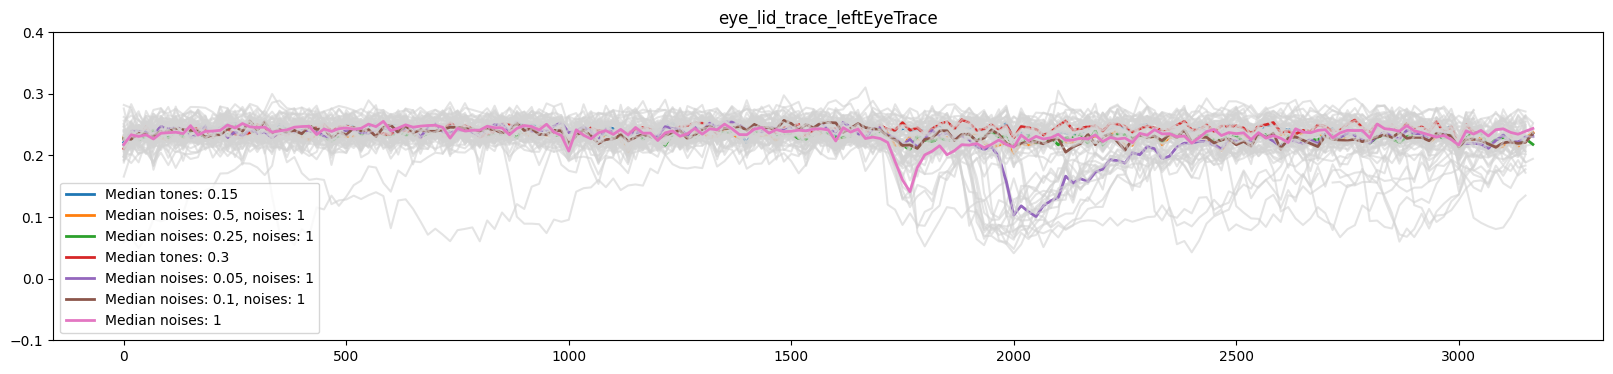

/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:36: RuntimeWarning: All-NaN slice encountered
  median_values = np.nanmedian(stacked, axis=0)
/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:37: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(stacked, axis=0)


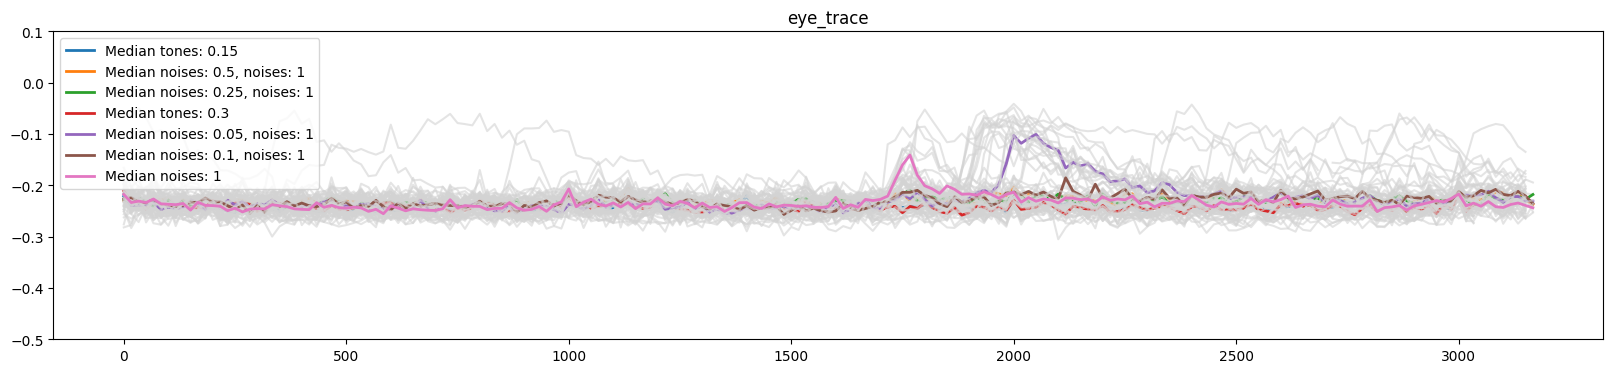

/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:36: RuntimeWarning: All-NaN slice encountered
  median_values = np.nanmedian(stacked, axis=0)
/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:37: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(stacked, axis=0)


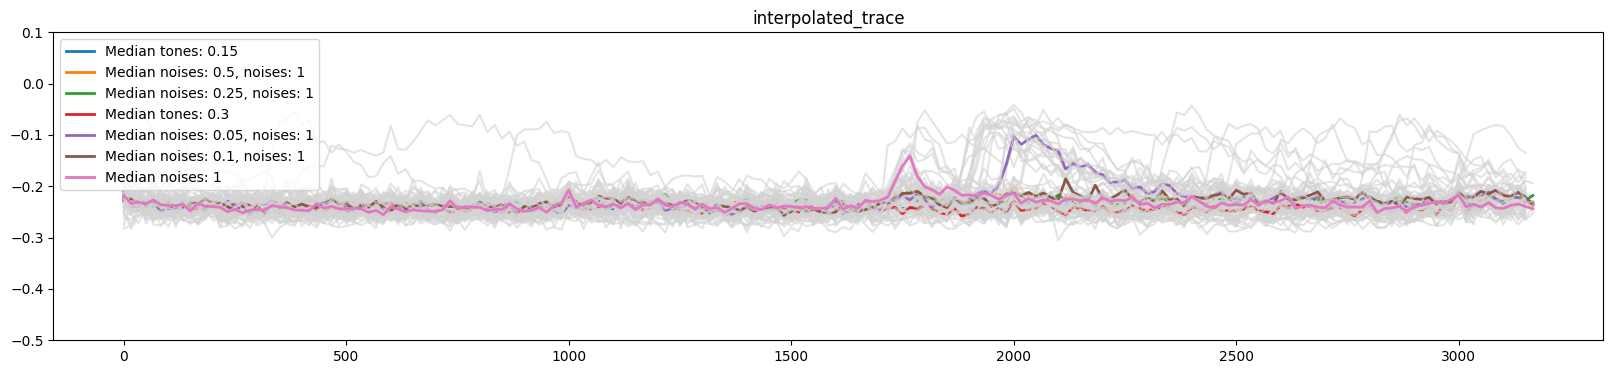

/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:36: RuntimeWarning: All-NaN slice encountered
  median_values = np.nanmedian(stacked, axis=0)
/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:37: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(stacked, axis=0)


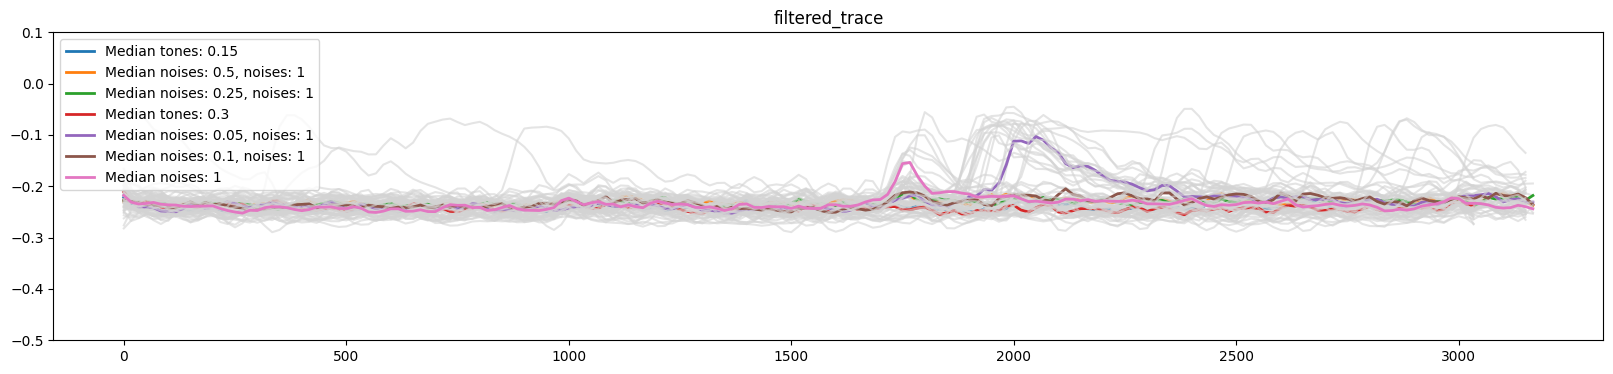

In [147]:
plot_median(df, 'eye_lid_trace_leftEyeTrace', 'proto_trial_hash', y_min=-0.1, y_max=0.4)
plot_median(df, 'eye_trace', 'proto_trial_hash', y_min=-0.5, y_max=0.1)
plot_median(df, 'interpolated_trace', 'proto_trial_hash', y_min=-0.5, y_max=0.1)
plot_median(df, 'filtered_trace', 'proto_trial_hash', y_min=-0.5, y_max=0.1)


/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:36: RuntimeWarning: All-NaN slice encountered
  median_values = np.nanmedian(stacked, axis=0)
/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:37: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(stacked, axis=0)


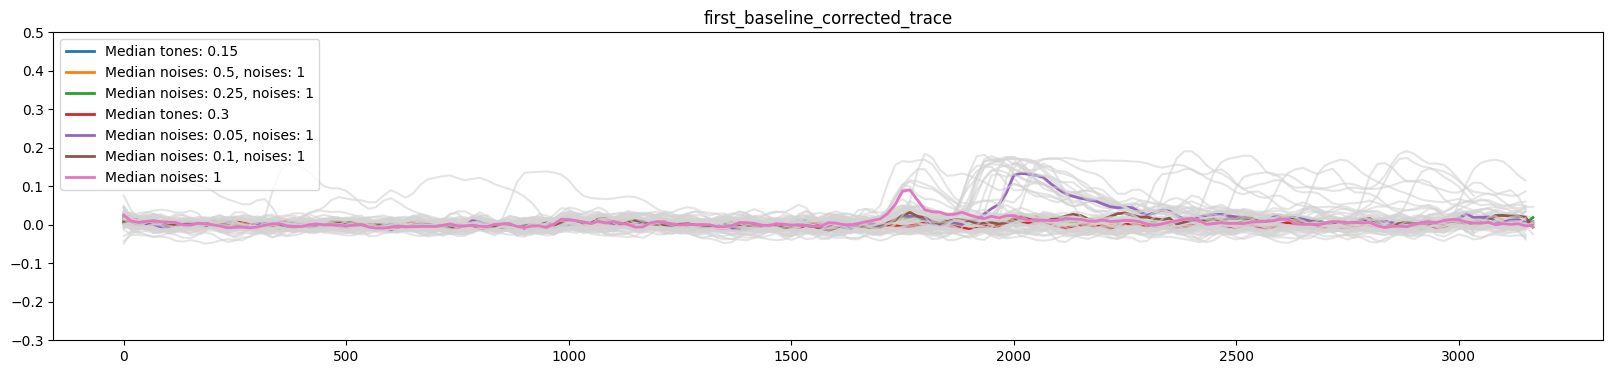

In [148]:
plot_median(df, 'first_baseline_corrected_trace', 'proto_trial_hash', y_min=-0.3, y_max=0.5)


/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:36: RuntimeWarning: All-NaN slice encountered
  median_values = np.nanmedian(stacked, axis=0)
/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:37: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(stacked, axis=0)


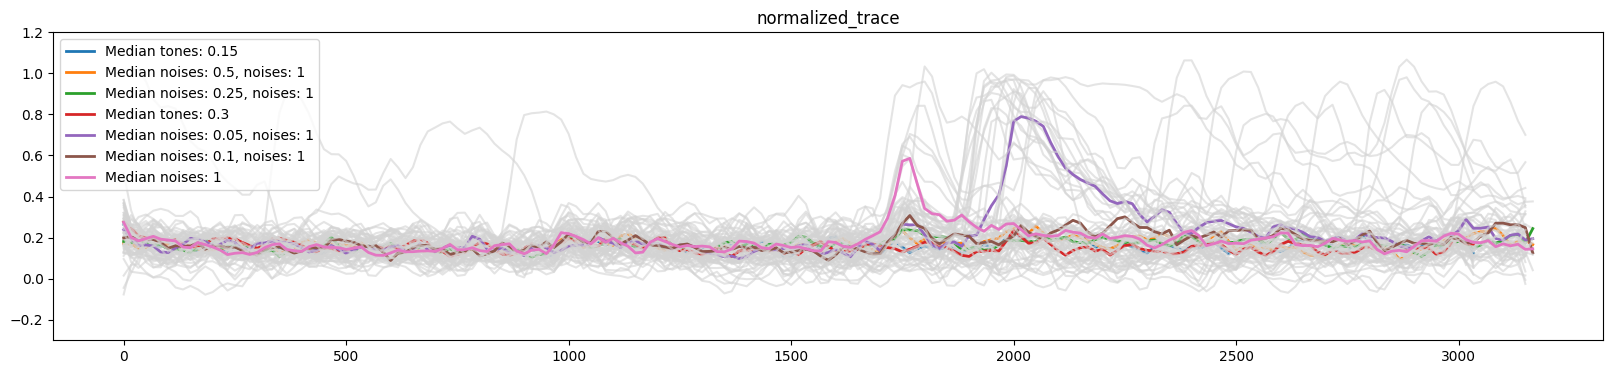

In [149]:
plot_median(df, 'normalized_trace', 'proto_trial_hash', y_min=-0.3, y_max=1.2)

/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:36: RuntimeWarning: All-NaN slice encountered
  median_values = np.nanmedian(stacked, axis=0)
/var/folders/tp/076vydys6wvgzngvpl_0hyz40000gn/T/ipykernel_78224/985184857.py:37: RuntimeWarning: Mean of empty slice
  mean_values = np.nanmean(stacked, axis=0)


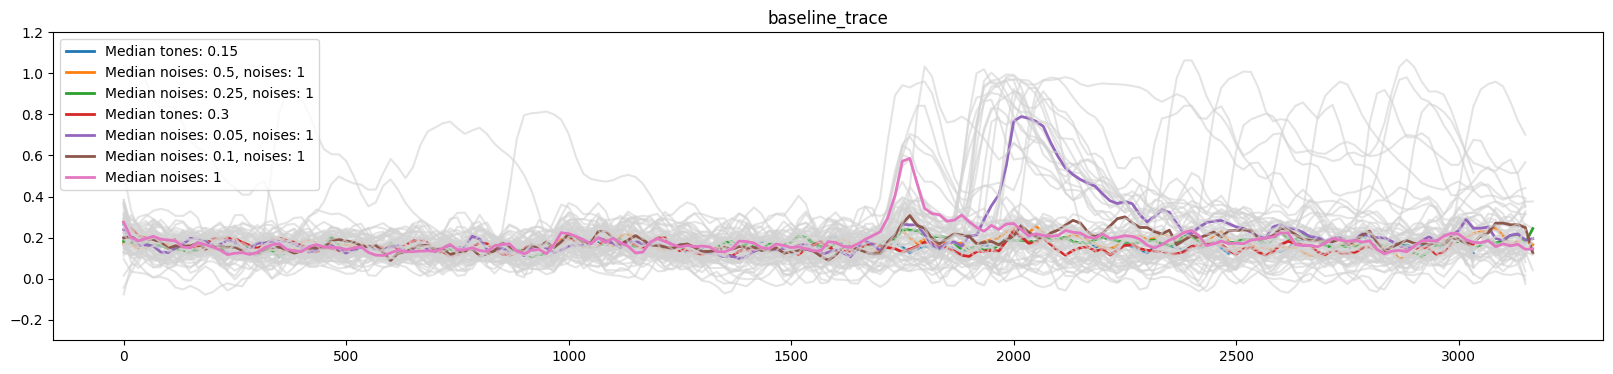

In [150]:
plot_median(df, 'baseline_trace', 'proto_trial_hash', y_min=-0.3, y_max=1.2)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   proto_trial_content             70 non-null     object 
 1   proto_trial_hash                70 non-null     object 
 2   eye_lid_trace_leftEyeTrace      70 non-null     object 
 3   trial_sortOrder                 70 non-null     int64  
 4   label                           70 non-null     object 
 5   eye_trace                       69 non-null     object 
 6   nan_percentage                  70 non-null     float64
 7   interpolated_trace              69 non-null     object 
 8   filtered_trace                  69 non-null     object 
 9   first_baseline_corrected_trace  69 non-null     object 
 10  normalized_trace                69 non-null     object 
 11  baseline_trace                  69 non-null     object 
dtypes: float64(1), int64(1), object(10)
me

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   proto_trial_content             70 non-null     object 
 1   proto_trial_hash                70 non-null     object 
 2   eye_lid_trace_leftEyeTrace      70 non-null     object 
 3   trial_sortOrder                 70 non-null     int64  
 4   label                           70 non-null     object 
 5   eye_trace                       69 non-null     object 
 6   nan_percentage                  70 non-null     float64
 7   has_extreme_outliers            70 non-null     bool   
 8   interpolated_trace              69 non-null     object 
 9   filtered_trace                  69 non-null     object 
 10  first_baseline_corrected_trace  58 non-null     object 
 11  normalized_trace                58 non-null     object 
 12  baseline_trace                  49 non

In [ ]:
df.head(100)